In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r'C:\Users\Windows 10\Desktop\Web Scrap\2022 Top World Universities.xlsx', sheet_name='2022 Top World 200 Universities')
print(data)

     RANK                                     UNIVERSITY        COUNTRY  \
0       1          Massachusetts Institute of Technology  United States   
1       2                             Harvard University  United States   
2       3                            Stanford University  United States   
3       4                             Cornell University  United States   
4       5             University of California, Berkeley  United States   
..    ...                                            ...            ...   
195   196                             Clemson University  United States   
196   197               Università degli Studi di Padova          Italy   
197   198                            Uppsala Universitet         Sweden   
198   199  Norges teknisk-naturvitenskaplige universitet         Norway   
199   200                    Kungliga Tekniska högskolan         Sweden   

    COUNTRY ABBRV  
0              us  
1              us  
2              us  
3              us  

In [3]:
# total number of times a country occured in the country column
valueCount=data['COUNTRY'].value_counts()
print(valueCount)

United States     105
United Kingdom     18
Germany            15
Canada             14
Australia           7
Netherlands         5
Spain               4
Switzerland         4
Sweden              3
Czech Republic      2
Italy               2
Belgium             2
Austria             2
China               2
Japan               2
Norway              2
Argentina           1
Mexico              1
Singapore           1
Denmark             1
Finland             1
New Zealand         1
Brazil              1
Saudi Arabia        1
Hong Kong           1
Chile               1
Portugal            1
Name: COUNTRY, dtype: int64


In [4]:
#total number of countries in the country column
NumberOfCountry=data['COUNTRY'].nunique()
print('The Total Number Of Countries in The COUNTRY Column is :', NumberOfCountry)

The Total Number Of Countries in The COUNTRY Column is : 27


In [5]:
#total number of universities in the country column
NumberOfUnis=data['UNIVERSITY'].nunique()
print('The Total Number Of Universities In The University Column is : ', NumberOfUnis)

The Total Number Of Universities In The University Column is :  200


In [6]:
# total number of times a university occured in the university column
data['UNIVERSITY'].value_counts()

Massachusetts Institute of Technology       1
École Polytechnique Fédérale de Lausanne    1
University of Central Florida               1
Universitetet i Oslo                        1
National University of Singapore            1
                                           ..
University of Georgia                       1
University of Waterloo                      1
Oregon State University                     1
Brown University                            1
Kungliga Tekniska högskolan                 1
Name: UNIVERSITY, Length: 200, dtype: int64

In [7]:
# grouping of Countries and their Universities
CountryGroup=data.groupby('COUNTRY').value_counts(ascending=False).sort_index(ascending=False)
print(CountryGroup)

COUNTRY        RANK  UNIVERSITY                         COUNTRY ABBRV
United States  196   Clemson University                  us              1
               195   The University of Oklahoma          us              1
               190   University of Vermont               us              1
               189   Virginia Commonwealth University    us              1
               188   San Diego State University          us              1
                                                                        ..
Australia      67    The University of Melbourne         au              1
               65    The University of Sydney            au              1
               56    Monash University                   au              1
               54    The University of New South Wales   au              1
Argentina      96    Universidad de Buenos Aires         ar              1
Length: 200, dtype: int64


In [8]:
# Keep rows where COUNTRY is one of:  United Kingdom,  United States
USAndGB = data.loc[data['COUNTRY'].isin(['United Kingdom', 'United States'])]
# Calcualting Total Universities From United States and United Kingdom
totalCount = USAndGB['UNIVERSITY'].nunique()
print('Total Number Of Times United Kingdom And United States Occured In The COUNTRY column is:',totalCount)

Total Number Of Times United Kingdom And United States Occured In The COUNTRY column is: 123


In [9]:
# Descending Ranks of both United States and United Kingdom together
descendingRanks = USAndGB.sort_values(by=['RANK'], ascending=[False])
print(descendingRanks)

     RANK                             UNIVERSITY         COUNTRY COUNTRY ABBRV
195   196                     Clemson University   United States            us
194   195             The University of Oklahoma   United States            us
192   193                   Lancaster University  United Kingdom            gb
189   190                  University of Vermont   United States            us
188   189       Virginia Commonwealth University   United States            us
..    ...                                    ...             ...           ...
4       5     University of California, Berkeley   United States            us
3       4                     Cornell University   United States            us
2       3                    Stanford University   United States            us
1       2                     Harvard University   United States            us
0       1  Massachusetts Institute of Technology   United States            us

[123 rows x 4 columns]


In [10]:
# Select columns
selectColumns = data[['UNIVERSITY', 'COUNTRY']]

# Fetch only 'United States' Countries
filterUS = selectColumns.loc[selectColumns['COUNTRY'].isin(['United States'])]

print(filterUS)

                                UNIVERSITY        COUNTRY
0    Massachusetts Institute of Technology  United States
1                       Harvard University  United States
2                      Stanford University  United States
3                       Cornell University  United States
4       University of California, Berkeley  United States
..                                     ...            ...
187             San Diego State University  United States
188       Virginia Commonwealth University  United States
189                  University of Vermont  United States
194             The University of Oklahoma  United States
195                     Clemson University  United States

[105 rows x 2 columns]


In [11]:
# Change data type of RANK to Integer
data['RANK'] = pd.to_numeric(data['RANK'], downcast='integer', errors='coerce')

# Keep rows where COUNTRY is one of:  United States
keepUS = data.loc[data['COUNTRY'].isin(['United States'])]

# Sort column(s) RANK descending 
show = keepUS.sort_values(by=['RANK'], ascending=[False])
print(show)



     RANK                             UNIVERSITY        COUNTRY COUNTRY ABBRV
195   196                     Clemson University  United States            us
194   195             The University of Oklahoma  United States            us
189   190                  University of Vermont  United States            us
188   189       Virginia Commonwealth University  United States            us
187   188             San Diego State University  United States            us
..    ...                                    ...            ...           ...
4       5     University of California, Berkeley  United States            us
3       4                     Cornell University  United States            us
2       3                    Stanford University  United States            us
1       2                     Harvard University  United States            us
0       1  Massachusetts Institute of Technology  United States            us

[105 rows x 4 columns]


In [12]:
# Keep rows where COUNTRY is one of:  United Kingdom
keepGB = data.loc[data['COUNTRY'].isin(['United Kingdom'])]

# Sort column(s) RANK descending 
showGB = keepGB.sort_values(by=['RANK'], ascending=[False])
print(showGB)

     RANK                                         UNIVERSITY         COUNTRY  \
192   193                               Lancaster University  United Kingdom   
183   184                             The University of York  United Kingdom   
180   181                                  Durham University  United Kingdom   
161   162                            University of Liverpool  United Kingdom   
160   161                               Newcastle University  United Kingdom   
146   147                              King's College London  United Kingdom   
138   139                                University of Leeds  United Kingdom   
132   133                          The University of Warwick  United Kingdom   
131   132                           University of Birmingham  United Kingdom   
108   109                          University of Southampton  United Kingdom   
104   105                              University of Glasgow  United Kingdom   
100   101                            Imp

In [13]:
# Keep rows where COUNTRY is one of: Germany
keepDE = data.loc[data['COUNTRY'].isin(['Germany'])]

# Sort column(s) RANK descending 
showDE = keepDE.sort_values(by=['RANK'], ascending=[False])
print(showDE)

     RANK                                         UNIVERSITY  COUNTRY  \
193   194                Karlsruher Institut für Technologie  Germany   
181   182     Rheinische Friedrich-Wilhelms-Universität Bonn  Germany   
177   178                                Universität zu Köln  Germany   
175   176                     Technische Universität Dresden  Germany   
171   172               Goethe-Universität Frankfurt am Main  Germany   
165   166  Friedrich-Alexander-Universität Erlangen-Nürnberg  Germany   
159   160                     Humboldt-Universität zu Berlin  Germany   
154   155                                Universität Hamburg  Germany   
153   154                      Technische Universität Berlin  Germany   
151   152  Rheinisch-Westfälische Technische Hochschule A...  Germany   
150   151                            Ruhr-Universität Bochum  Germany   
126   127              Ruprecht-Karls-Universität Heidelberg  Germany   
114   115                     Technische Universitä

In [14]:
# Keep rows where COUNTRY is one of:  Canada
keepCA = data.loc[data['COUNTRY'].isin(['Canada'])]

# Sort column(s) RANK descending 
showCA = keepCA.sort_values(by=['RANK'], ascending=[False])
print(showCA)

     RANK                          UNIVERSITY COUNTRY COUNTRY ABBRV
191   192                    Université Laval  Canada            ca
168   169                  Queen's University  Canada            ca
148   149              University of Victoria  Canada            ca
143   144                  Western University  Canada            ca
140   141              Université de Montréal  Canada            ca
125   126                 McMaster University  Canada            ca
117   118               University of Calgary  Canada            ca
112   113                     York University  Canada            ca
83     84               University of Alberta  Canada            ca
73     74             Simon Fraser University  Canada            ca
70     71              University of Waterloo  Canada            ca
56     57                   McGill University  Canada            ca
25     26  The University of British Columbia  Canada            ca
22     23               University of Toronto  C

In [15]:
# Keep rows where COUNTRY is one of: Australia
keepAU = data.loc[data['COUNTRY'].isin(['Australia'])]

# Sort column(s) RANK descending 
showAU = keepAU.sort_values(by=['RANK'], ascending=[False])
print(showAU)

     RANK                         UNIVERSITY    COUNTRY COUNTRY ABBRV
186   187         The University of Adelaide  Australia            au
84     85     Australian National University  Australia            au
75     76       The University of Queensland  Australia            au
66     67        The University of Melbourne  Australia            au
64     65           The University of Sydney  Australia            au
55     56                  Monash University  Australia            au
53     54  The University of New South Wales  Australia            au


In [16]:
# Group by COUNTRY and calculate new column(s)
totalUnis = data.groupby(['COUNTRY']).agg(**{'TOTAL-UNIVERSITIES': ('UNIVERSITY', 'size')}).reset_index()
print(totalUnis)

           COUNTRY  TOTAL-UNIVERSITIES
0        Argentina                   1
1        Australia                   7
2          Austria                   2
3          Belgium                   2
4           Brazil                   1
5           Canada                  14
6            Chile                   1
7            China                   2
8   Czech Republic                   2
9          Denmark                   1
10         Finland                   1
11         Germany                  15
12       Hong Kong                   1
13           Italy                   2
14           Japan                   2
15          Mexico                   1
16     Netherlands                   5
17     New Zealand                   1
18          Norway                   2
19        Portugal                   1
20    Saudi Arabia                   1
21       Singapore                   1
22           Spain                   4
23          Sweden                   3
24     Switzerland       

In [17]:
# Group by COUNTRY and calculate new columns in Descending Order
viewDesc = totalUnis.sort_values(by=['TOTAL-UNIVERSITIES'], ascending=[False])
print(viewDesc)

           COUNTRY  TOTAL-UNIVERSITIES
26   United States                 105
25  United Kingdom                  18
11         Germany                  15
5           Canada                  14
1        Australia                   7
16     Netherlands                   5
24     Switzerland                   4
22           Spain                   4
23          Sweden                   3
18          Norway                   2
14           Japan                   2
13           Italy                   2
8   Czech Republic                   2
7            China                   2
3          Belgium                   2
2          Austria                   2
12       Hong Kong                   1
10         Finland                   1
9          Denmark                   1
15          Mexico                   1
17     New Zealand                   1
19        Portugal                   1
20    Saudi Arabia                   1
21       Singapore                   1
6            Chile       

In [18]:
data.describe()

,RANK
count,200.000000
mean,100.500000
std,57.879185
min,1.000000
25%,50.750000
50%,100.500000
75%,150.250000
max,200.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           200 non-null    int16 
 1   UNIVERSITY     200 non-null    object
 2   COUNTRY        200 non-null    object
 3   COUNTRY ABBRV  200 non-null    object
dtypes: int16(1), object(3)
memory usage: 5.2+ KB


In [37]:
fig1 = px.bar(viewDesc, y=['TOTAL-UNIVERSITIES', 'COUNTRY'], x='COUNTRY', title='Total Universities Per Country')
fig1

In [34]:

fig2 = px.pie(viewDesc, values='TOTAL-UNIVERSITIES', names='COUNTRY',title='USA Accounts For The Majority of COUNTRY Column')
fig2

In [33]:
fig3 = px.treemap(data, path=['COUNTRY', 'UNIVERSITY'],title='Countries And Their Universities' )
fig3

In [32]:
fig4 = px.bar(show, x='RANK', y='UNIVERSITY')
fig4.update_layout(title='Universities With Lower Ranks To Higher Ranks In United States')
fig4

In [31]:
fig5 = px.bar(showGB, x='RANK', y='UNIVERSITY')
fig5.update_layout(title='Universities With Lower Ranks To Higher Ranks In United Kingdom')
fig5

In [30]:
fig6 = px.bar(showCA, x='RANK', y='UNIVERSITY')
fig6.update_layout(title='Universities With Lower Ranks To Higher Ranks In Canada')
fig6

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='RANK', ylabel='COUNTRY'>

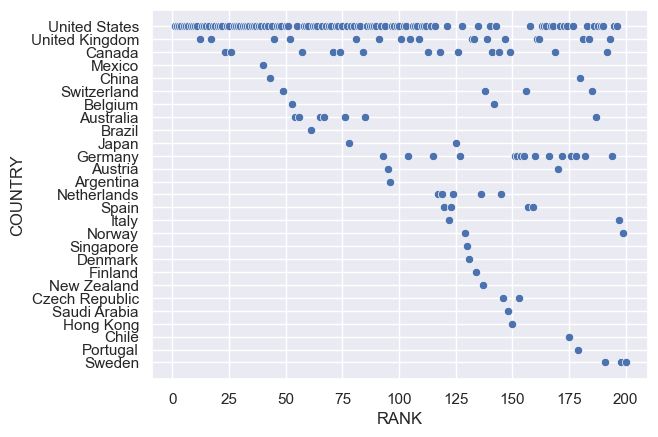

In [26]:
sns.set()
valueCount=data['COUNTRY'].value_counts()
sns.scatterplot(data['RANK'], data['COUNTRY'])

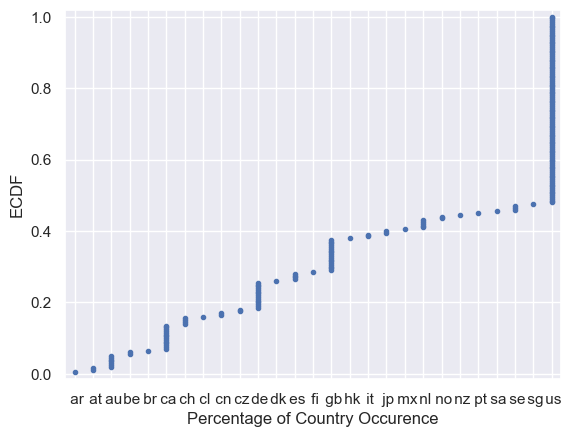

In [29]:
x=np.sort(data['COUNTRY ABBRV'])
y=np.arange(1, len(x)+1)/len(x) 
_=plt.plot(x,y,marker='.', linestyle='none')
_=plt.xlabel('Percentage of Country Occurence')
_=plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()